In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import umap
from yellowbrick.cluster import SilhouetteVisualizer 
from sklearn.manifold import TSNE
import seaborn as sns

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


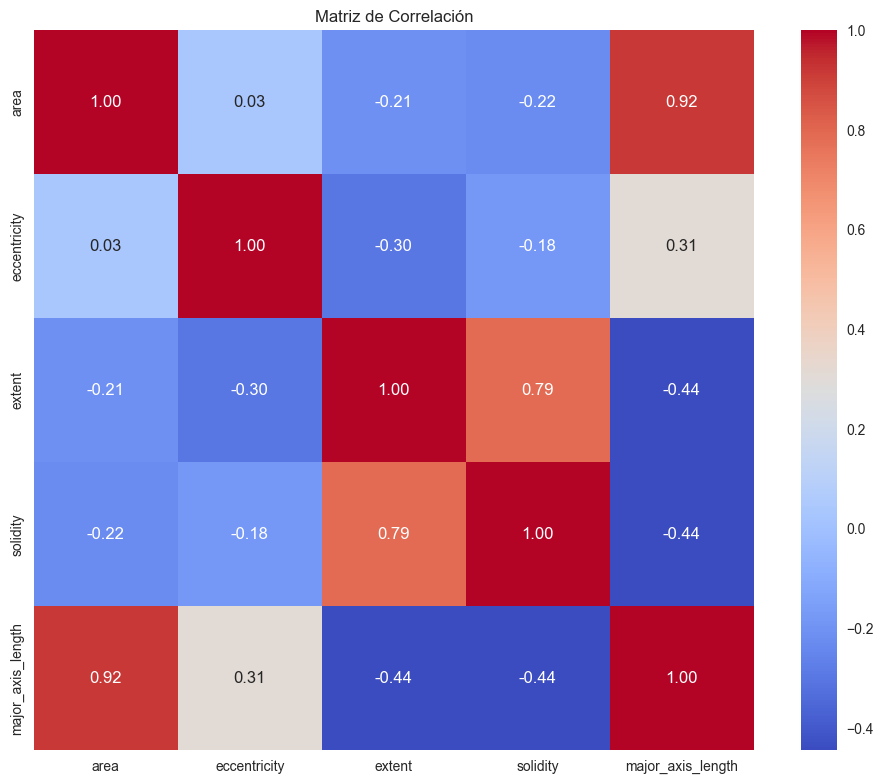

In [23]:
corr_matrix = df_shape_mm_selected.corr(numeric_only=True)

# Visualizar la matriz con seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Matriz de Correlación")
plt.tight_layout()
plt.show()

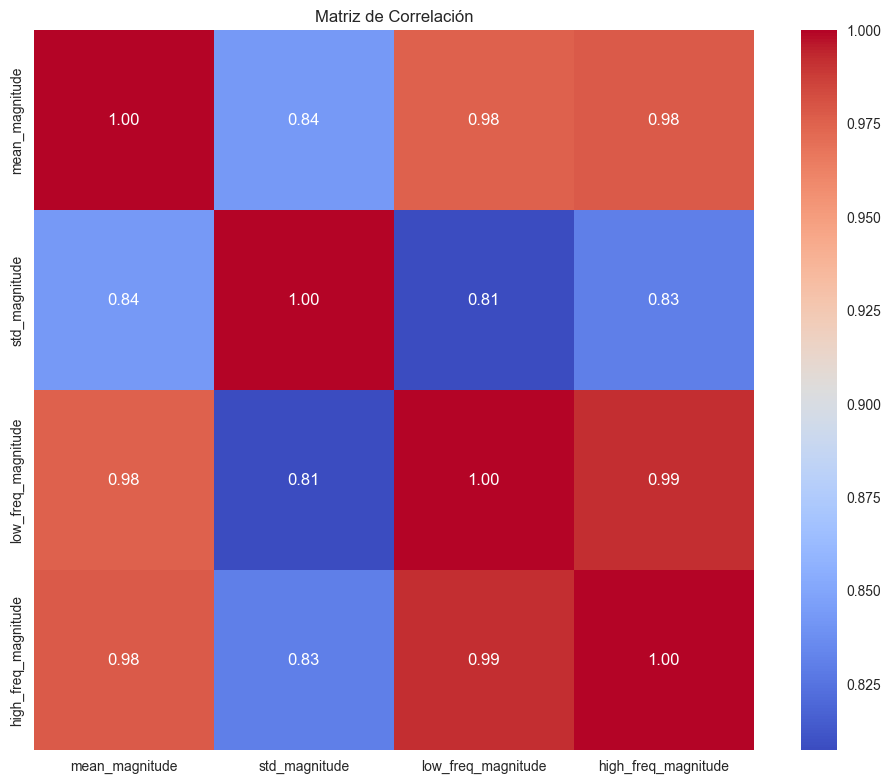

In [25]:
corr_matrix = df_fourier_mm.corr(numeric_only=True)

# Visualizar la matriz con seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Matriz de Correlación")
plt.tight_layout()
plt.show()

In [22]:
#Se van a combinar dos vectores: el extraidos a partir de la transformada de Fourier y el extraidoa partir de la forma de los callos.
folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"

#Primero se cargan las caraterísticas normalizadas por z-score y min-max de forma.
# Cargar las características normalizadas por Z-score
df_shape_z = pd.read_csv(os.path.join(folder_path, "features_shape_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_shape_mm = pd.read_csv(os.path.join(folder_path, "features_shape_minmax.csv"))

#Después se cargan las caraterísticas normalizadas por z-score y min-max de fourier.
df_fourier_z = pd.read_csv(os.path.join(folder_path, "features_fourier_all_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_fourier_mm = pd.read_csv(os.path.join(folder_path, "features_fourier_all_minmax.csv"))

#Selección de columnas de shape, porque de fourier las voy a usar todas
#Seleccionadas (z-score)
selected_shape_z = ['area', 'eccentricity', 'extent', 'solidity', 'major_axis_length']
df_shape_z_selected = df_shape_z[selected_shape_z]

#Seleccionadas (min-max)
selected_shape_mm = ['area', 'eccentricity', 'extent', 'solidity', 'major_axis_length']
df_shape_mm_selected = df_shape_mm[selected_shape_mm]

#combinación z-score
df_combined_fs_z = pd.concat([df_shape_z_selected, df_fourier_z ], axis=1)

#combinación minmax
df_combined_fs_mm = pd.concat([df_shape_mm_selected, df_fourier_mm], axis=1)

# Guardar en archivos CSV
df_combined_fs_z.to_csv(os.path.join(folder_path, "features_combined_fs_zscore.csv"), index=False)
df_combined_fs_mm.to_csv(os.path.join(folder_path, "features_combined_fs_minmax.csv"), index=False)

In [3]:
df_combined_fs_z

,area,eccentricity,extent,solidity,major_axis_length,mean_magnitude,std_magnitude,low_freq_magnitude,high_freq_magnitude,filename,label
0,-0.961415,1.258475,-0.843346,0.135962,-0.597306,-0.675069,-0.789859,-0.897021,-1.099034,callo_1.png,smaller
1,-0.360419,1.265948,-1.740919,-1.705151,0.510064,-0.332674,0.421457,-0.087640,0.128736,callo_10.png,smaller
2,-1.007075,0.280864,1.120647,1.269197,-1.051417,-0.726203,-1.157138,-0.882415,-0.876548,callo_100.png,smaller
3,-0.791399,0.602786,1.184475,0.913221,-0.690335,-0.624806,-0.816866,-0.490506,-0.490618,callo_101.png,smaller
4,-1.449934,-0.817832,1.002834,1.210664,-1.792010,-1.317448,-1.644363,-1.428906,-1.326237,callo_102.png,smaller
...,...,...,...,...,...,...,...,...,...,...,...
532,0.677867,-0.758095,-0.543333,-0.607485,0.538420,0.749086,0.945783,0.887860,0.885922,callo_95.png,higher
533,1.092142,-1.279988,0.358045,0.055104,0.529269,0.989613,0.780056,1.338128,1.304986,callo_96.png,higher
534,0.792944,0.155389,-0.292736,-0.289068,0.734055,0.873905,0.820400,0.651903,0.660034,callo_97.png,higher
535,0.594344,-0.407132,-1.763399,-1.467330,0.819826,0.896289,1.520130,0.721742,1.004862,callo_98.png,higher


In [4]:
df_combined_fs_mm

,area,eccentricity,extent,solidity,major_axis_length,mean_magnitude,std_magnitude,low_freq_magnitude,high_freq_magnitude,filename,label
0,0.164032,0.840083,0.448592,0.749355,0.358292,0.321215,0.291837,0.274240,0.234906,callo_1.png,smaller
1,0.297348,0.841452,0.301952,0.441238,0.592452,0.382919,0.518457,0.426258,0.434512,callo_10.png,smaller
2,0.153903,0.660993,0.769458,0.939005,0.262267,0.312000,0.223125,0.276983,0.271077,callo_100.png,smaller
3,0.201746,0.719967,0.779886,0.879431,0.338620,0.330273,0.286785,0.350592,0.333820,callo_101.png,smaller
4,0.055665,0.459722,0.750210,0.929210,0.105664,0.205450,0.131972,0.174341,0.197968,callo_102.png,smaller
...,...,...,...,...,...,...,...,...,...,...,...
532,0.527668,0.470665,0.497607,0.624936,0.598448,0.577865,0.616550,0.609478,0.557612,callo_95.png,higher
533,0.619565,0.375058,0.644869,0.735823,0.596513,0.621211,0.585545,0.694047,0.625742,callo_96.png,higher
534,0.553195,0.638007,0.538548,0.678224,0.639816,0.600359,0.593093,0.565160,0.520888,callo_97.png,higher
535,0.509140,0.534958,0.298279,0.481038,0.657953,0.604393,0.724002,0.578277,0.576949,callo_98.png,higher


In [5]:
#se quitan las columnas 'filename' y 'label'
df_combined_fs_mm_cl= df_combined_fs_mm.drop(columns=['filename', 'label'])
df_combined_fs_z_cl= df_combined_fs_z.drop(columns=['filename', 'label'])


A continuación, se va hacer clustering con el método K-means del vector combinado.
Primero con los datos normalizados con z-score.

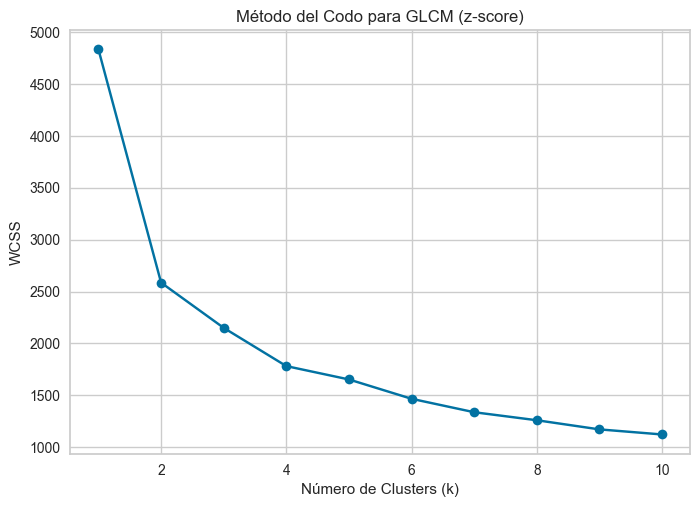

In [6]:
# Método del codo
WCSS = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000, random_state=42)
    kmeans.fit(df_combined_fs_z_cl)
    WCSS.append(kmeans.inertia_)

# Graficar el codo
plt.plot(range(1, 11), WCSS, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.title('Método del Codo para GLCM (z-score)')
plt.grid(True)
plt.show()

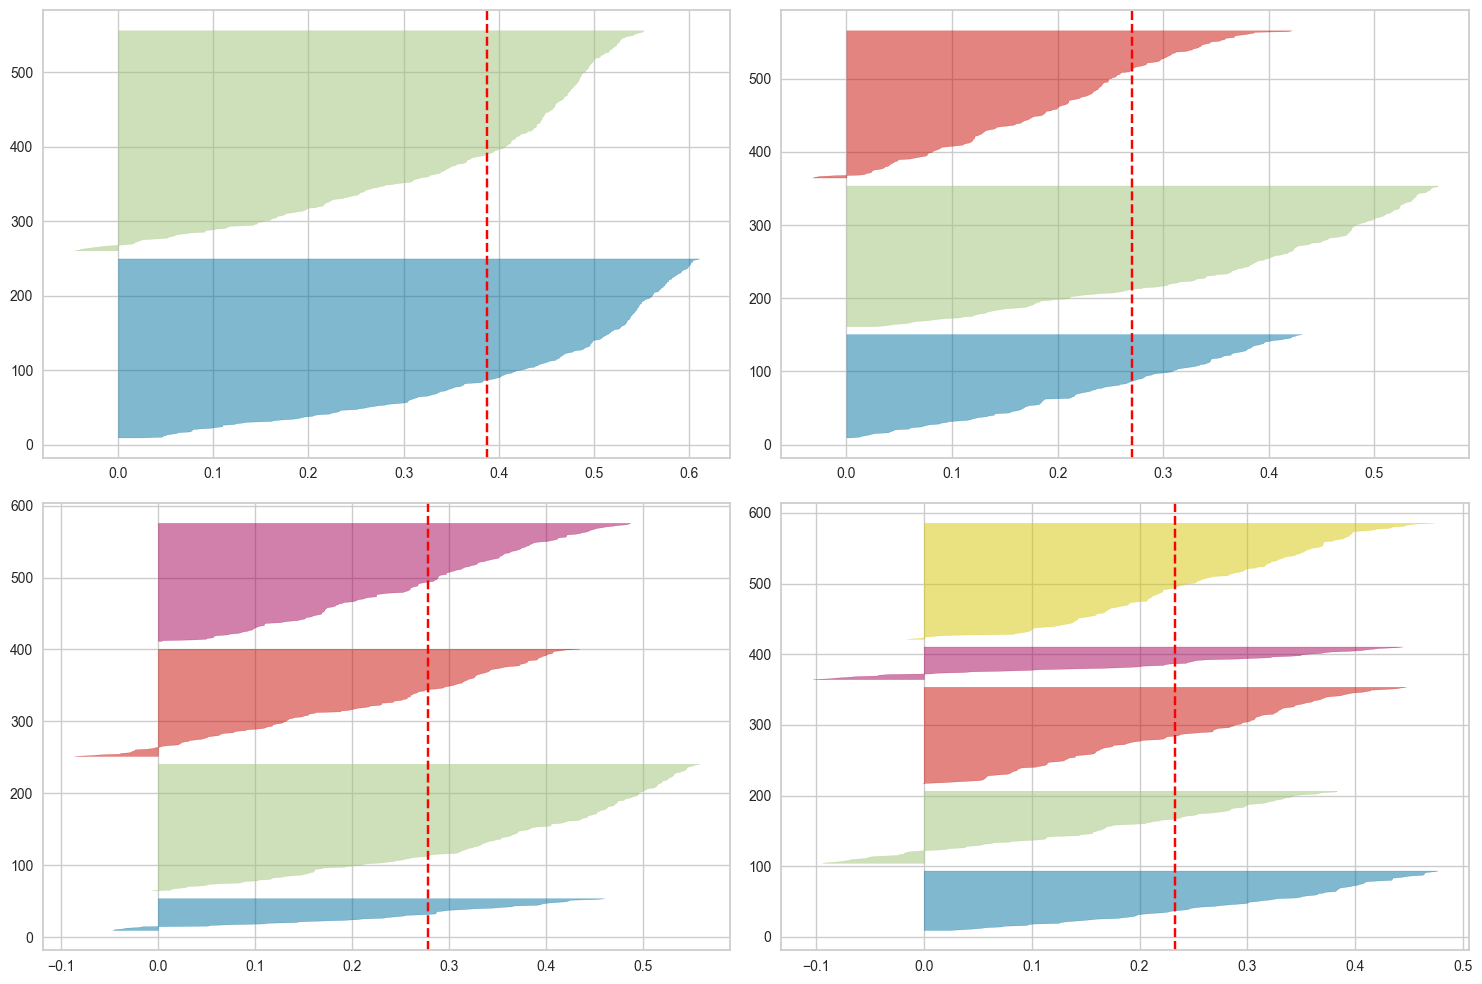

In [7]:
# Creamos la figura con 2x2 subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Probamos con k = 2, 3, 4, 5
for i, k in enumerate([2, 3, 4, 5]):
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    
    # Posición del subplot
    row = i // 2
    col = i % 2
    
    # Creamos el visualizador y ajustamos los datos
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[row][col])
    visualizer.fit(df_combined_fs_z_cl)  

plt.tight_layout()
plt.show()

In [8]:
#Modelo k-means
cluster_shape_z= KMeans(init='k-means++',n_clusters=2,random_state=42)
cluster_shape_z.fit(df_combined_fs_z_cl)   

KMeans(n_clusters=2, random_state=42)

In [9]:
#Se añaden las etiquetas y vemos en una tabla de contigencia cuantos smaller o higher hay en cada cluster
df_combined_fs_z['Cluster'] = cluster_shape_z.labels_
pd.crosstab(df_combined_fs_z['Cluster'], df_combined_fs_z['label'])

label,higher,smaller
Cluster,,
0,31,216
1,237,53


In [20]:
silhouette_avg_fs_z = silhouette_score(df_combined_fs_z_cl, cluster_shape_z.labels_)
print(f'Índice de silueta promedio: {silhouette_avg_fs_z}')

Índice de silueta promedio: 0.3877622301920984


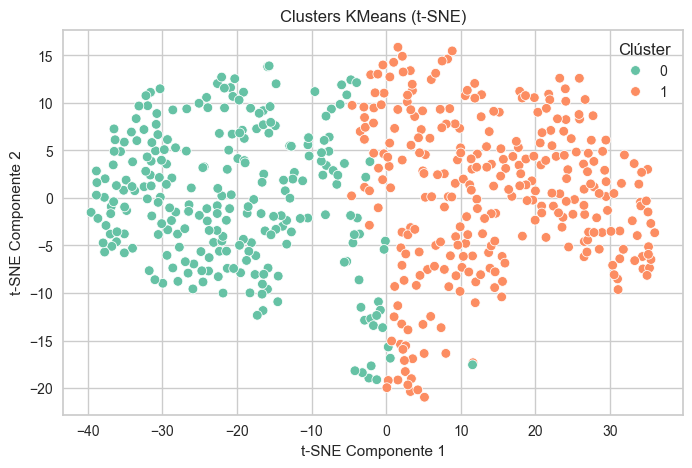

In [11]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_combined_fs_z_cl)

# Visualización
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df_combined_fs_z['Cluster'], palette='Set2')
plt.title('Clusters KMeans (t-SNE)')
plt.xlabel('t-SNE Componente 1')
plt.ylabel('t-SNE Componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


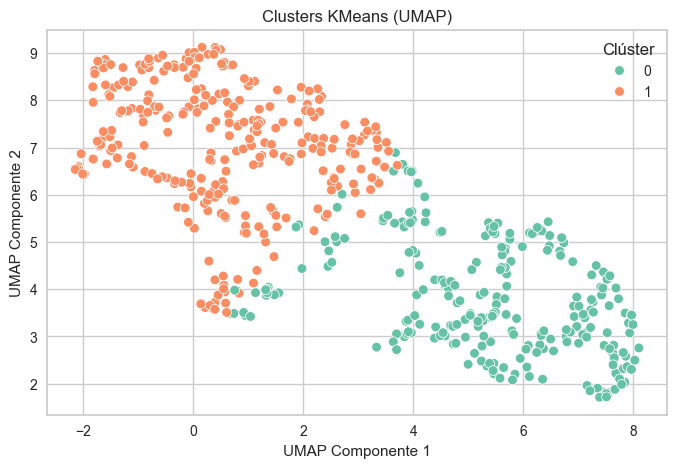

In [12]:
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(df_combined_fs_z_cl)

# Visualización correcta con UMAP
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=df_combined_fs_z['Cluster'], palette='Set2')
plt.title('Clusters KMeans (UMAP)')
plt.xlabel('UMAP Componente 1')
plt.ylabel('UMAP Componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()


Ahora se realiza lo mismo pero con la normalización min-max

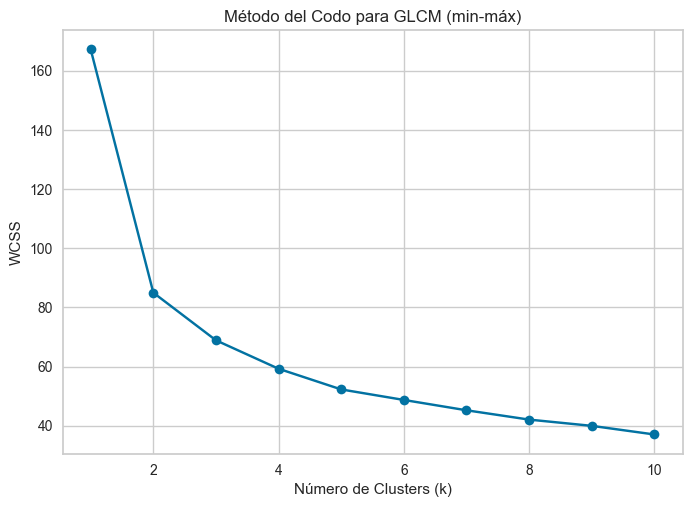

In [13]:
# Método del codo
WCSS = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000, random_state=42)
    kmeans.fit(df_combined_fs_mm_cl)
    WCSS.append(kmeans.inertia_)

# Graficar el codo
plt.plot(range(1, 11), WCSS, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.title('Método del Codo para GLCM (min-máx)')
plt.grid(True)
plt.show()

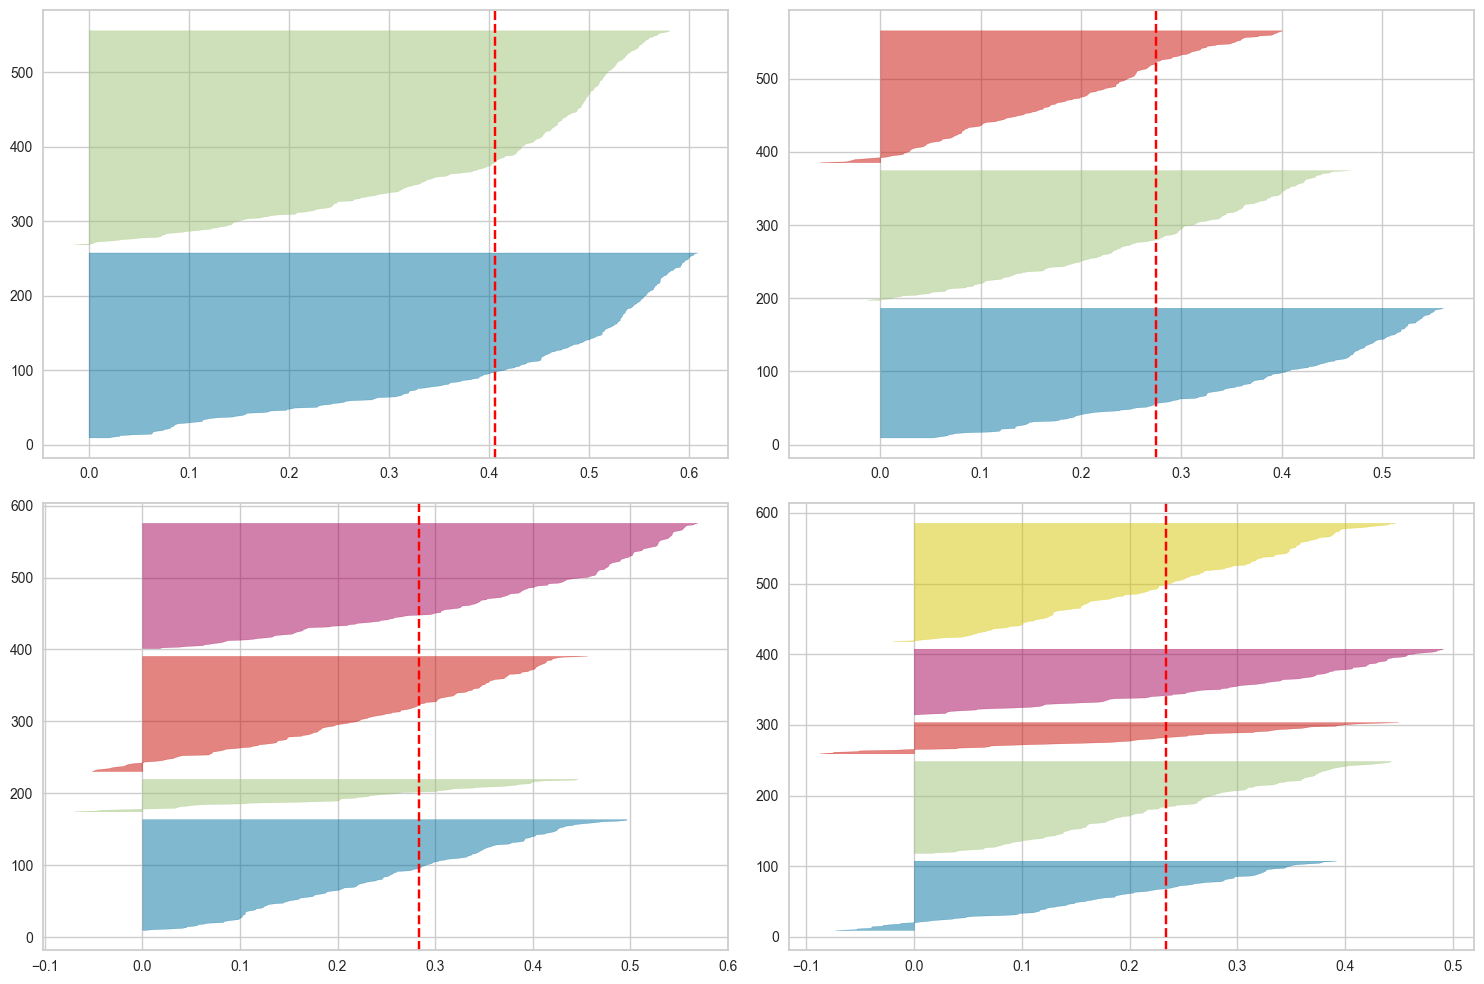

In [14]:
# Creamos la figura con 2x2 subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Probamos con k = 2, 3, 4, 5
for i, k in enumerate([2, 3, 4, 5]):
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    
    # Posición del subplot
    row = i // 2
    col = i % 2
    
    # Creamos el visualizador y ajustamos los datos
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[row][col])
    visualizer.fit(df_combined_fs_mm_cl)  

plt.tight_layout()
plt.show()

In [15]:
#Modelo k-means
cluster_shape_mm= KMeans(init='k-means++',n_clusters=2,random_state=42)
cluster_shape_mm.fit(df_combined_fs_mm_cl)   

KMeans(n_clusters=2, random_state=42)

In [21]:
#Se añaden las etiquetas y vemos en una tabla de contigencia cuantos smaller o higher hay en cada cluster
df_combined_fs_mm['Cluster'] = cluster_shape_mm.labels_
pd.crosstab(df_combined_fs_mm['Cluster'], df_combined_fs_mm['label'])

label,higher,smaller
Cluster,,
0,27,222
1,241,47


In [17]:
silhouette_avg_fs_mm = silhouette_score(df_combined_fs_mm_cl, cluster_shape_mm.labels_)
print(f'Índice de silueta promedio: {silhouette_avg_fs_mm}')

Índice de silueta promedio: 0.4061319112883794


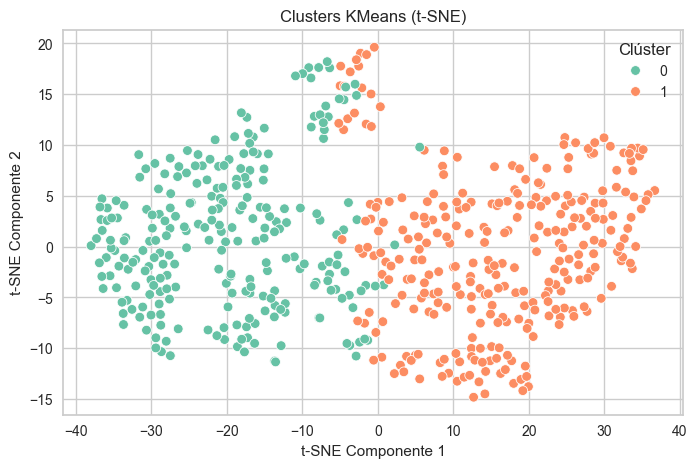

In [18]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_combined_fs_mm_cl)

# Visualización
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df_combined_fs_mm['Cluster'], palette='Set2')
plt.title('Clusters KMeans (t-SNE)')
plt.xlabel('t-SNE Componente 1')
plt.ylabel('t-SNE Componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


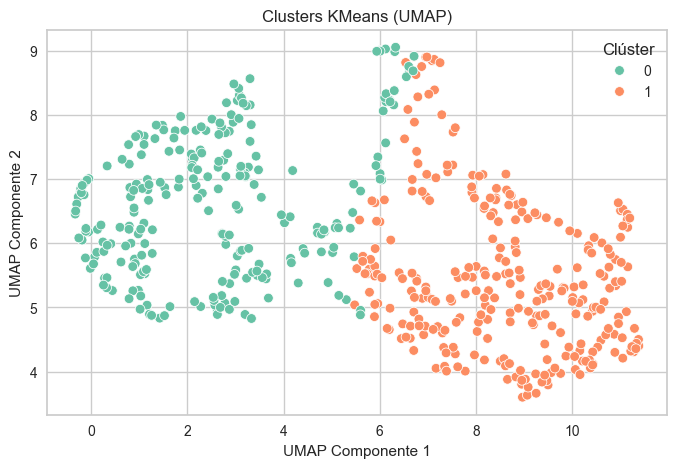

In [19]:
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(df_combined_fs_mm_cl)

# Visualización 
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=df_combined_fs_mm['Cluster'], palette='Set2')
plt.title('Clusters KMeans (UMAP)')
plt.xlabel('UMAP Componente 1')
plt.ylabel('UMAP Componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()
